In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [96]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [97]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [98]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [99]:
df.reset_index(drop=True,inplace=True)

In [100]:
df.drop(all_indices,axis=0,inplace= True)

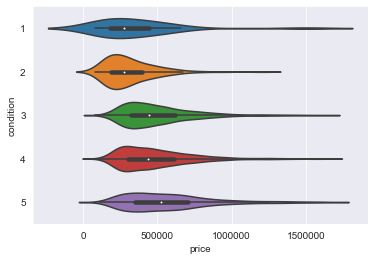

In [101]:
sns.violinplot(x='price', y='condition', data=df, orient='h')
plt.show()

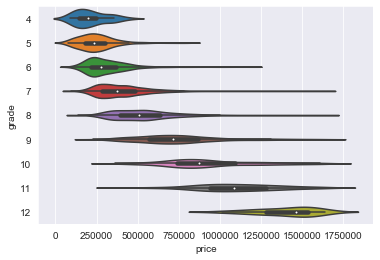

In [102]:
sns.violinplot(x='price', y='grade', data=df, orient='h')
plt.show()

In [103]:
features =  ['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

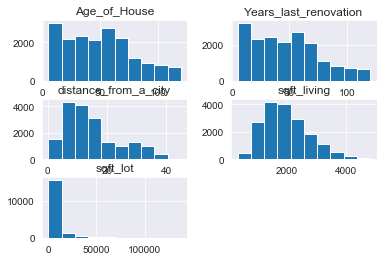

In [104]:
df[features].hist();

In [105]:
tobox =['sqft_living','distance_from_a_city','sqft_lot']

In [106]:
for feat in tobox:
    df[feat] = np.log(df[feat])


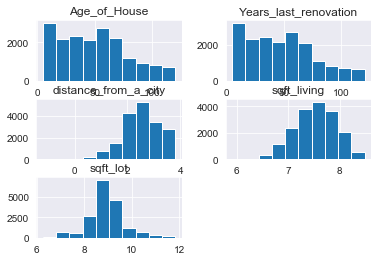

In [107]:
df[features].hist();

In [108]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [109]:
df['bedbath'] = df['bedrooms']*df['bathrooms']

In [110]:
df['livinglot'] = df['sqft_living']*df['sqft_lot']

In [111]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation','bedbath','livinglot']


In [112]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [113]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [114]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport', 'bedbath',
       'livinglot'],
      dtype='object')

In [115]:
df['grade4'] = df.grade.apply(lambda x: 1 if x ==4 else 0)
df['grade5'] = df.grade.apply(lambda x: 1 if x ==5 else 0)
df['grade6'] = df.grade.apply(lambda x: 1 if x ==6 else 0)
df['grade7'] = df.grade.apply(lambda x: 1 if x ==7 else 0)
df['grade8'] = df.grade.apply(lambda x: 1 if x ==8 else 0)
df['grade9'] = df.grade.apply(lambda x: 1 if x ==9 else 0)
df['grade10'] = df.grade.apply(lambda x: 1 if x ==10 else 0)
df['grade11'] = df.grade.apply(lambda x: 1 if x ==11 else 0)


In [116]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'Age_of_House','basement','bedbath','grade']
# outcome = ['price']

In [117]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
           'grade4', 'grade5', 'grade6', 'grade7', 'grade8', 'grade9',
       'grade10', 'grade11']
outcome = ['price']

In [118]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'basement', 'cond3',
#        'cond4', 'cond5']
# outcome = ['price']

In [119]:
X = df[x_cols]
y = df['price']

In [120]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                          2.126e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:23:59   Log-Likelihood:                     -2.4164e+05
No. Observations:               18208   AIC:                                  4.833e+05
Df Residuals:                   18195   BIC:                                  4.834e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.496e+04   1390.933    -10.754      0.000   -1.77e+04   -1.22e+04
bathrooms             1.198e+04   1683.591      7.117      0.000    8681.655    1.53e+04
sqft_living           9.946e+04   2132.229     46.644      0.000    9.53e+04    1.04e+05
sqft_lot              2.987e+04   1251.829     23.861      0.000    2.74e+04    3.23e+04
distance_from_a_city -1.301e+05   1134.300   -114.701      0.000   -1.32e+05   -1.28e+05
grade4                5.032e+05   2.84e+04     17.720      0.000    4.48e+05    5.59e+05
grade5                4.602e+05   1.04e+04     44.405      0.000     4.4e+05    4.81e+05
grade6                4.346e+05   3930.647    110.562      0.000    4.27e+05    4.42e+05
grade7                4.516e+05   1715.986    263.178      0.000    4.48e+05    4.55e+05
grade8                5.032e+05   2036.004    247.167      0.000    4.99e+05    5.07e+05
grade9                6.259e+05   3417.963    183.126      0.000    6.19e+05    6.33e+05
grade10               7.365e+05   5497.732    133.968      0.000    7.26e+05    7.47e+05
grade11               8.667e+05   1.05e+04     82.212      0.000    8.46e+05    8.87e+05
==============================================================================
Omnibus:                     6093.621   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47392.207
Skew:                           1.396   Prob(JB):                         0.00
Kurtosis:                      10.394   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

13 13
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.496e+04,1390.933,-10.754,0.0,-1.77e+04,-1.22e+04
bathrooms,1.198e+04,1683.591,7.117,0.0,8681.655,1.53e+04
sqft_living,9.946e+04,2132.229,46.644,0.0,9.53e+04,1.04e+05
sqft_lot,2.987e+04,1251.829,23.861,0.0,2.74e+04,3.23e+04
distance_from_a_city,-1.301e+05,1134.300,-114.701,0.0,-1.32e+05,-1.28e+05


In [122]:
X = df[x_cols]
y= df['price']

In [123]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                          2.126e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:24:01   Log-Likelihood:                     -2.4164e+05
No. Observations:               18208   AIC:                                  4.833e+05
Df Residuals:                   18195   BIC:                                  4.834e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.496e+04   1390.933    -10.754      0.000   -1.77e+04   -1.22e+04
bathrooms             1.198e+04   1683.591      7.117      0.000    8681.655    1.53e+04
sqft_living           9.946e+04   2132.229     46.644      0.000    9.53e+04    1.04e+05
sqft_lot              2.987e+04   1251.829     23.861      0.000    2.74e+04    3.23e+04
distance_from_a_city -1.301e+05   1134.300   -114.701      0.000   -1.32e+05   -1.28e+05
grade4                5.032e+05   2.84e+04     17.720      0.000    4.48e+05    5.59e+05
grade5                4.602e+05   1.04e+04     44.405      0.000     4.4e+05    4.81e+05
grade6                4.346e+05   3930.647    110.562      0.000    4.27e+05    4.42e+05
grade7                4.516e+05   1715.986    263.178      0.000    4.48e+05    4.55e+05
grade8                5.032e+05   2036.004    247.167      0.000    4.99e+05    5.07e+05
grade9                6.259e+05   3417.963    183.126      0.000    6.19e+05    6.33e+05
grade10               7.365e+05   5497.732    133.968      0.000    7.26e+05    7.47e+05
grade11               8.667e+05   1.05e+04     82.212      0.000    8.46e+05    8.87e+05
==============================================================================
Omnibus:                     6093.621   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47392.207
Skew:                           1.396   Prob(JB):                         0.00
Kurtosis:                      10.394   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.7866851323764361),
 ('bathrooms', 2.6176343377086186),
 ('sqft_living', 4.198591822320555),
 ('sqft_lot', 1.4471919487144047),
 ('distance_from_a_city', 1.188204790996301),
 ('grade4', 1.0225085607841775),
 ('grade5', 1.0842120589191975),
 ('grade6', 1.378451302283879),
 ('grade7', 1.1606511517832714),
 ('grade8', 1.1063829823043665),
 ('grade9', 1.2834839650709933),
 ('grade10', 1.2463932421542647),
 ('grade11', 1.0936457628696923)]

In [125]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

13 13


In [126]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                          2.126e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:24:03   Log-Likelihood:                     -2.4164e+05
No. Observations:               18208   AIC:                                  4.833e+05
Df Residuals:                   18195   BIC:                                  4.834e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.496e+04   1390.933    -10.754      0.000   -1.77e+04   -1.22e+04
bathrooms             1.198e+04   1683.591      7.117      0.000    8681.655    1.53e+04
sqft_living           9.946e+04   2132.229     46.644      0.000    9.53e+04    1.04e+05
sqft_lot              2.987e+04   1251.829     23.861      0.000    2.74e+04    3.23e+04
distance_from_a_city -1.301e+05   1134.300   -114.701      0.000   -1.32e+05   -1.28e+05
grade4                5.032e+05   2.84e+04     17.720      0.000    4.48e+05    5.59e+05
grade5                4.602e+05   1.04e+04     44.405      0.000     4.4e+05    4.81e+05
grade6                4.346e+05   3930.647    110.562      0.000    4.27e+05    4.42e+05
grade7                4.516e+05   1715.986    263.178      0.000    4.48e+05    4.55e+05
grade8                5.032e+05   2036.004    247.167      0.000    4.99e+05    5.07e+05
grade9                6.259e+05   3417.963    183.126      0.000    6.19e+05    6.33e+05
grade10               7.365e+05   5497.732    133.968      0.000    7.26e+05    7.47e+05
grade11               8.667e+05   1.05e+04     82.212      0.000    8.46e+05    8.87e+05
==============================================================================
Omnibus:                     6093.621   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47392.207
Skew:                           1.396   Prob(JB):                         0.00
Kurtosis:                      10.394   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

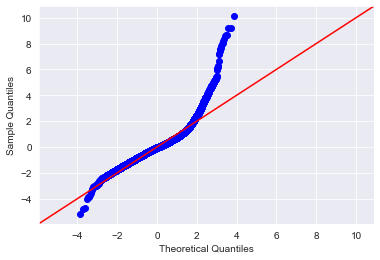

In [127]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


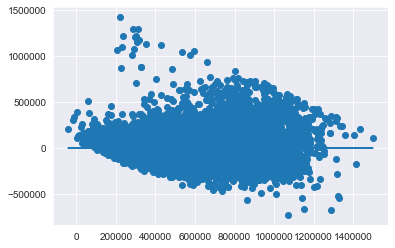

In [128]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

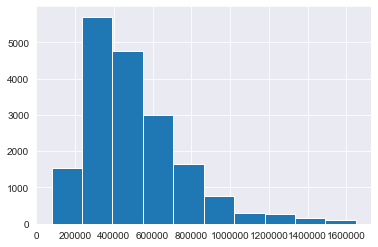

In [129]:
df.price.hist()

In [130]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 675960.0
0.81 percentile: 690000.0
0.82 percentile: 700000.0
0.83 percentile: 716000.0
0.84 percentile: 730000.0
0.85 percentile: 746474.9999999995
0.86 percentile: 760000.0
0.87 percentile: 775000.0
0.88 percentile: 795000.0
0.89 percentile: 810229.9999999997
0.9 percentile: 834000.0
0.91 percentile: 855000.0
0.92 percentile: 880000.0
0.93 percentile: 911559.0000000019
0.94 percentile: 950000.0
0.95 percentile: 991629.9999999995
0.96 percentile: 1060000.0
0.97 percentile: 1160000.0
0.98 percentile: 1260000.0
0.99 percentile: 1400000.0


In [131]:
orig_tot = len(df)
df = df[df.price < 1000000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.04822056239015817


In [132]:
X = df[x_cols]
y = df['price']

In [133]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     3241.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:24:08   Log-Likelihood:            -2.2538e+05
No. Observations:               17330   AIC:                         4.508e+05
Df Residuals:                   17317   BIC:                         4.509e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.172e+04   1101.995    -10.631      0.000   -1.39e+04   -9555.678
bathrooms             3153.0656   1336.522      2.359      0.018     533.348    5772.783
sqft_living           8.315e+04   1681.702     49.442      0.000    7.99e+04    8.64e+04
sqft_lot              2.376e+04    986.729     24.079      0.000    2.18e+04    2.57e+04
distance_from_a_city -1.086e+05    916.934   -118.434      0.000    -1.1e+05   -1.07e+05
grade4                4.466e+05   2.18e+04     20.503      0.000    4.04e+05    4.89e+05
grade5                4.178e+05   7963.845     52.465      0.000    4.02e+05    4.33e+05
grade6                4.045e+05   3043.462    132.896      0.000    3.98e+05     4.1e+05
grade7                4.395e+05   1326.131    331.423      0.000    4.37e+05    4.42e+05
grade8                4.975e+05   1582.447    314.409      0.000    4.94e+05    5.01e+05
grade9                5.917e+05   2765.983    213.935      0.000    5.86e+05    5.97e+05
grade10               6.588e+05   4875.648    135.116      0.000    6.49e+05    6.68e+05
grade11               7.223e+05   1.31e+04     55.024      0.000    6.97e+05    7.48e+05
==============================================================================
Omnibus:                      592.658   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              925.650
Skew:                           0.325   Prob(JB):                    9.95e-202
Kurtosis:                       3.927   Cond. No.                         40.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

13 13
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.172e+04,1101.995,-10.631,0.000,-1.39e+04,-9555.678
bathrooms,3153.0656,1336.522,2.359,0.018,533.348,5772.783
sqft_living,8.315e+04,1681.702,49.442,0.000,7.99e+04,8.64e+04
sqft_lot,2.376e+04,986.729,24.079,0.000,2.18e+04,2.57e+04
distance_from_a_city,-1.086e+05,916.934,-118.434,0.000,-1.1e+05,-1.07e+05


In [135]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     3241.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:24:09   Log-Likelihood:            -2.2538e+05
No. Observations:               17330   AIC:                         4.508e+05
Df Residuals:                   17317   BIC:                         4.509e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.172e+04   1101.995    -10.631      0.000   -1.39e+04   -9555.678
bathrooms             3153.0656   1336.522      2.359      0.018     533.348    5772.783
sqft_living           8.315e+04   1681.702     49.442      0.000    7.99e+04    8.64e+04
sqft_lot              2.376e+04    986.729     24.079      0.000    2.18e+04    2.57e+04
distance_from_a_city -1.086e+05    916.934   -118.434      0.000    -1.1e+05   -1.07e+05
grade4                4.466e+05   2.18e+04     20.503      0.000    4.04e+05    4.89e+05
grade5                4.178e+05   7963.845     52.465      0.000    4.02e+05    4.33e+05
grade6                4.045e+05   3043.462    132.896      0.000    3.98e+05     4.1e+05
grade7                4.395e+05   1326.131    331.423      0.000    4.37e+05    4.42e+05
grade8                4.975e+05   1582.447    314.409      0.000    4.94e+05    5.01e+05
grade9                5.917e+05   2765.983    213.935      0.000    5.86e+05    5.97e+05
grade10               6.588e+05   4875.648    135.116      0.000    6.49e+05    6.68e+05
grade11               7.223e+05   1.31e+04     55.024      0.000    6.97e+05    7.48e+05
==============================================================================
Omnibus:                      592.658   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              925.650
Skew:                           0.325   Prob(JB):                    9.95e-202
Kurtosis:                       3.927   Cond. No.                         40.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.7827453962901096),
 ('bathrooms', 2.5052988606717066),
 ('sqft_living', 3.945726922288673),
 ('sqft_lot', 1.455155218947214),
 ('distance_from_a_city', 1.2009203265042578),
 ('grade4', 1.0237618933966914),
 ('grade5', 1.0895040800826892),
 ('grade6', 1.4032754758309414),
 ('grade7', 1.176080080844996),
 ('grade8', 1.1037470079861817),
 ('grade9', 1.2303881841075257),
 ('grade10', 1.1614788068588473),
 ('grade11', 1.026428054799767)]

In [137]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

13 13


In [138]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     3241.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:24:11   Log-Likelihood:            -2.2538e+05
No. Observations:               17330   AIC:                         4.508e+05
Df Residuals:                   17317   BIC:                         4.509e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.172e+04   1101.995    -10.631      0.000   -1.39e+04   -9555.678
bathrooms             3153.0656   1336.522      2.359      0.018     533.348    5772.783
sqft_living           8.315e+04   1681.702     49.442      0.000    7.99e+04    8.64e+04
sqft_lot              2.376e+04    986.729     24.079      0.000    2.18e+04    2.57e+04
distance_from_a_city -1.086e+05    916.934   -118.434      0.000    -1.1e+05   -1.07e+05
grade4                4.466e+05   2.18e+04     20.503      0.000    4.04e+05    4.89e+05
grade5                4.178e+05   7963.845     52.465      0.000    4.02e+05    4.33e+05
grade6                4.045e+05   3043.462    132.896      0.000    3.98e+05     4.1e+05
grade7                4.395e+05   1326.131    331.423      0.000    4.37e+05    4.42e+05
grade8                4.975e+05   1582.447    314.409      0.000    4.94e+05    5.01e+05
grade9                5.917e+05   2765.983    213.935      0.000    5.86e+05    5.97e+05
grade10               6.588e+05   4875.648    135.116      0.000    6.49e+05    6.68e+05
grade11               7.223e+05   1.31e+04     55.024      0.000    6.97e+05    7.48e+05
==============================================================================
Omnibus:                      592.658   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              925.650
Skew:                           0.325   Prob(JB):                    9.95e-202
Kurtosis:                       3.927   Cond. No.                         40.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

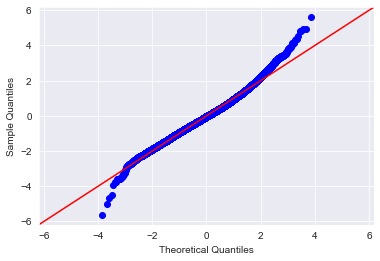

In [139]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


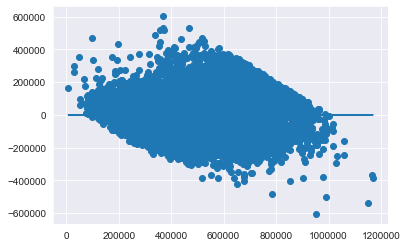

In [140]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [141]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [142]:
residuals = model.resid

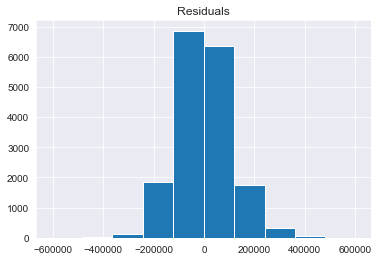

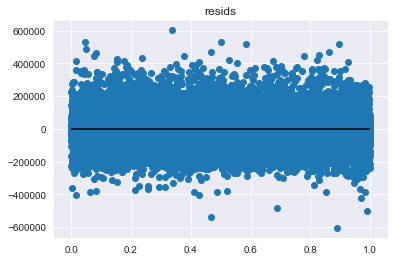

In [143]:
plot_residuals(residuals)

In [161]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [162]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [163]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.6885809000486521, 0.6872906084423362, 0.68813376421715)

In [164]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-83338.32699779223, -83324.41991769397, -83197.55029651397)

In [148]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols

In [149]:
make_ols_sklearn(X, y)

train R2 score = 0.6919504118471559
test R2 score = 0.6910537273655952
cv5 R2 score = 0.6885809000486521
cv10 R2 score = 0.6872906084423362
cv5 MSE score = -11664803462.88712
cv10  MSE score = -11664222346.133266


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [150]:
residuals = model.resid

In [151]:
resid = pd.DataFrame(df['price'])

In [152]:
resid['residuals']  = residuals

In [153]:
resid

,price,residuals
0,538000.0,30085.507588
1,180000.0,-39395.260712
2,604000.0,145926.484321
3,510000.0,17750.950177
5,257500.0,-8787.713025
...,...,...
19216,475000.0,-7338.192627
19217,360000.0,-78224.261904
19218,400000.0,-146781.359647
19219,402101.0,-96603.814696


In [154]:
import seaborn as sns

In [155]:
X_shuff, y_shuff = shuffle(X, y)

In [156]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.6911700339164041

In [157]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.690926186206584

In [158]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.6911520460950016

In [159]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     3241.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:24:26   Log-Likelihood:            -2.2538e+05
No. Observations:               17330   AIC:                         4.508e+05
Df Residuals:                   17317   BIC:                         4.509e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.172e+04 

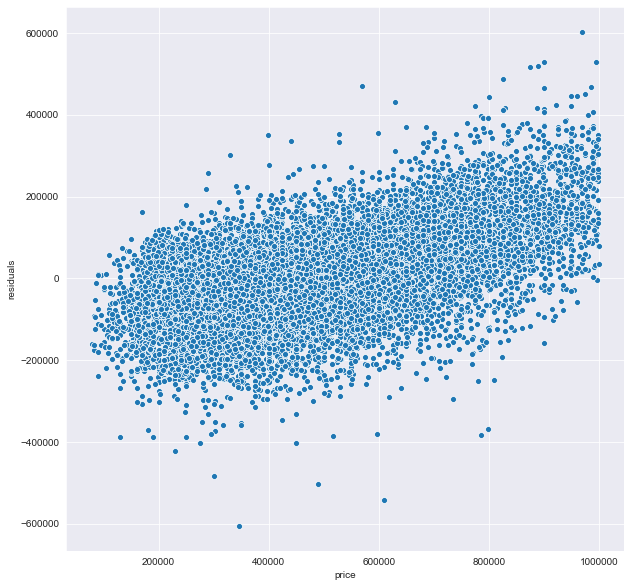

In [160]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)